In [1]:
import sys
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from pydotplus import graph_from_dot_data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
sys.path.append("..\\src")
sys.path.append("..\\..")
sys.path.append("..\\..\\ch02\\src")

In [3]:
from config import PATH_TO_DATA, PATH_TO_FIGURES
from plotting import plot_decision_surface

In [30]:
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"

# Import iris dataset

In [4]:
b_iris = load_iris()

In [5]:
b_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
b_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = b_iris.data[:, (2,3)]
y = b_iris.target

# Split into training and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Check whether the classes are equally represented in the training and test set.

In [9]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

In [10]:
np.bincount(y_train)

array([35, 35, 35], dtype=int64)

In [11]:
np.bincount(y_test)

array([15, 15, 15], dtype=int64)

# Scale training and test examples

In [12]:
sd_scaler = StandardScaler()
sd_scaler.fit(X_train)
scaled_X_train = sd_scaler.transform(X_train)
scaled_X_test = sd_scaler.transform(X_test)

# Perceptron classifier
## Fit perceptron

In [13]:
perceptron_classifier = Perceptron(eta0=0.005, max_iter=30, shuffle=False)
perceptron_classifier.fit(scaled_X_train, y_train)

Perceptron(eta0=0.005, max_iter=30, shuffle=False)

## Evaluate perceptron classifier

In [14]:
print("Accuracy: %.3f" % perceptron_classifier.score(scaled_X_train, y_train))

Accuracy: 0.895


In [15]:
print("Accuracy: %.3f" % perceptron_classifier.score(scaled_X_test, y_test))

Accuracy: 0.889


In [16]:
y_pred_train = perceptron_classifier.predict(scaled_X_train)
print("Accuracy: %.3f" % accuracy_score(y_train, y_pred_train))

Accuracy: 0.895


In [17]:
y_pred_test = perceptron_classifier.predict(scaled_X_test)
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred_test))

Accuracy: 0.889


## Plot decision regions of the perceptron classifier

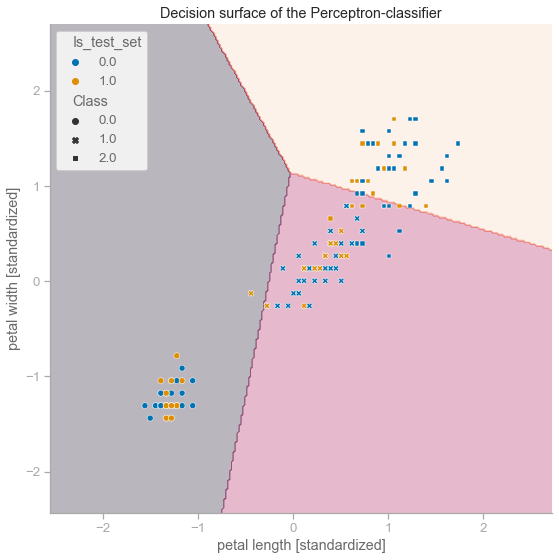

<AxesSubplot:title={'center':'Decision surface of the Perceptron-classifier'}, xlabel='petal length [standardized]', ylabel='petal width [standardized]'>

In [18]:
plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), perceptron_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]))

# Logistic regression classifier
## Fit logistic regression

In [19]:
logreg_classifier = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
logreg_classifier.fit(scaled_X_train, y_train)

LogisticRegression(C=100, multi_class='ovr', random_state=1)

## Return the class labels predicted using logistic regression

In [20]:
logreg_classifier.predict(scaled_X_test)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

The class is assigned to the label with the highest predicted probability.

In [21]:
logreg_classifier.predict_proba(scaled_X_test).argmax(axis=1)  # Returns the predicted class labels

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0], dtype=int64)

## Plot decision regions of the logistic regression classifier

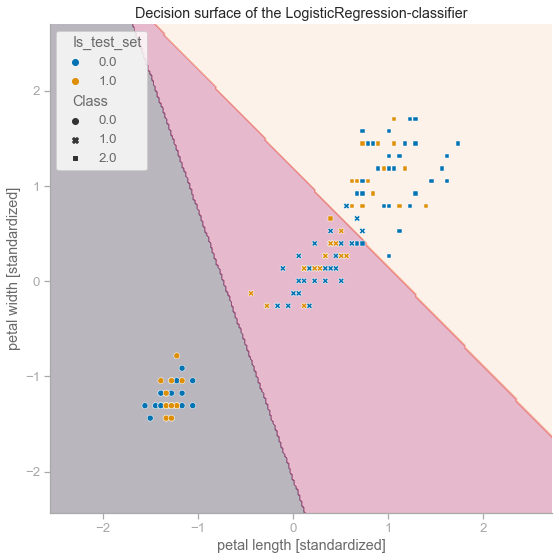

<AxesSubplot:title={'center':'Decision surface of the LogisticRegression-classifier'}, xlabel='petal length [standardized]', ylabel='petal width [standardized]'>

In [22]:
plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), logreg_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]))

# SVM classifier
## Fit SVM
Kernels available in scikit-learn:
- linear: linear decision surface that is placed between classes such that the margin between them is maximised (Logistic regression, for example, is also a linear classifier but, here, the misclassification error is minimised.)
- poly: polynomial kernel 
- rbf: radial basis function (Gaussian kernel)
- sigmoid: equivalent to logistic regression but 
- precomputed: custom kernel
The position of a soft-margin is often determined using cross-validation. The correctly classified examples within the soft margin are called support vectors. The choice of kernel, as well as the parameters of the kernel, is often chosen using nested cross-validation (see Section 8.6.1 in *Mathematics for Machine Learning*)

### Try different kernels 

Kernel = linear


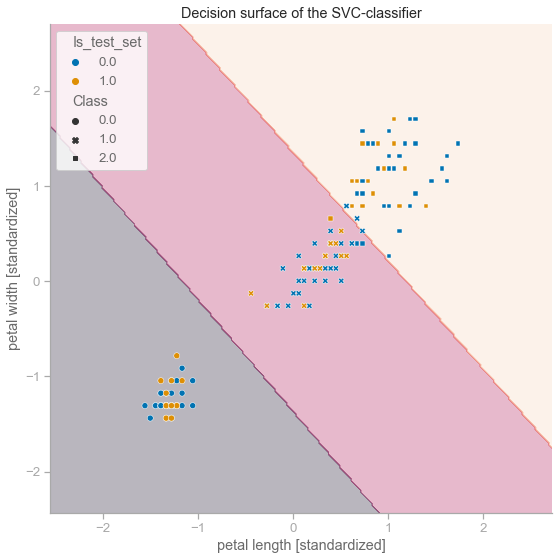

Kernel = sigmoid


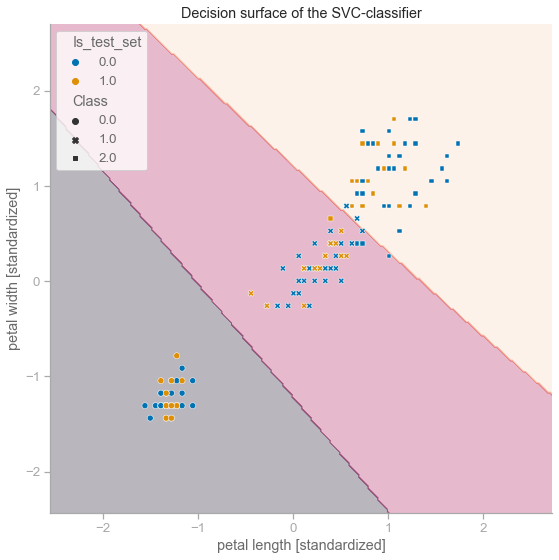

Kernel = poly


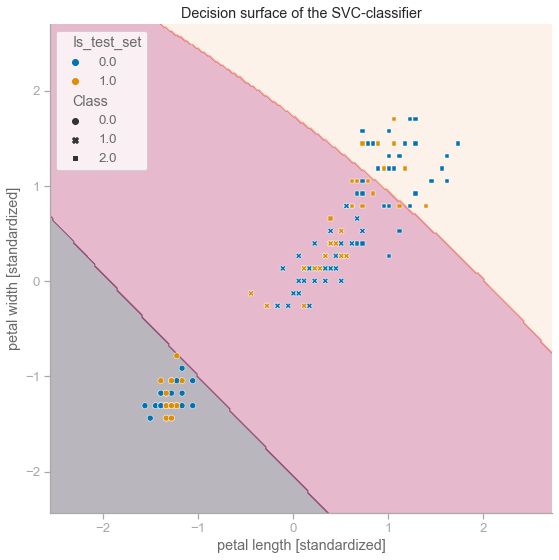

Kernel = rbf


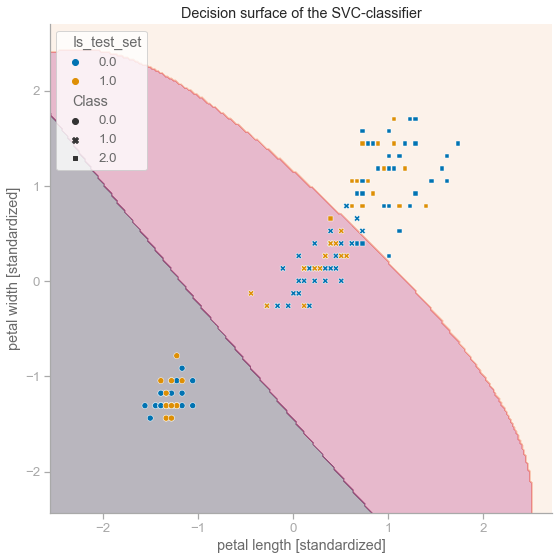

In [23]:
for kernel in ["linear", "sigmoid", "poly", "rbf"]:
    svc_classifier = SVC(gamma=0.2, random_state=1, kernel=kernel)
    svc_classifier.fit(scaled_X_train, y_train)
    print("Kernel = " + kernel)
    plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), svc_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]), save_fig=False)

Linear and sigmoid kernels lead to linear decision surfaces. Poly and RBF allow for curvatures.

## Try different parameters on the RBF kernel
### Variation in the regularization parameter C
The parameter C controls the penalty for misclassification. The larger C, the smaller the width of the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane (see p. 82).

This concept is closely related to regularization. Decreasing the value of C increases the bias but lowers the variance of the model --> the model becomes more robust but may be less precise.

C = 0.1


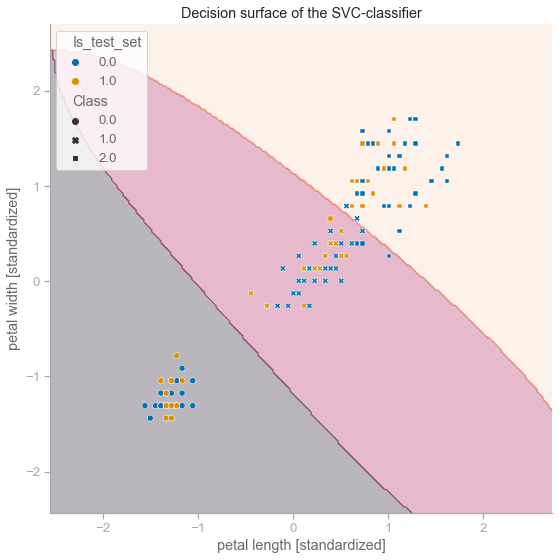

C = 1.3250000000000002


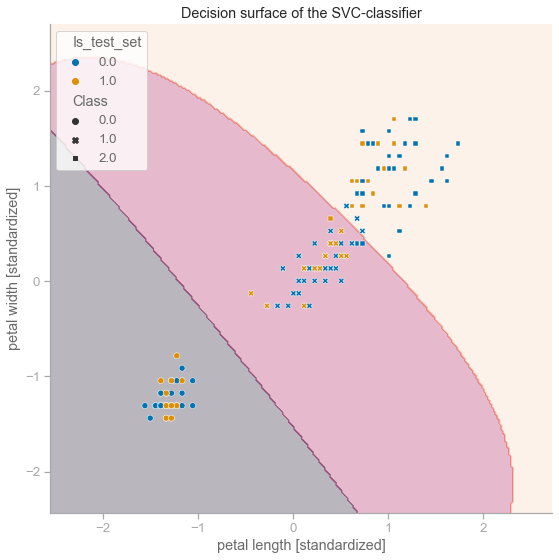

C = 2.5500000000000003


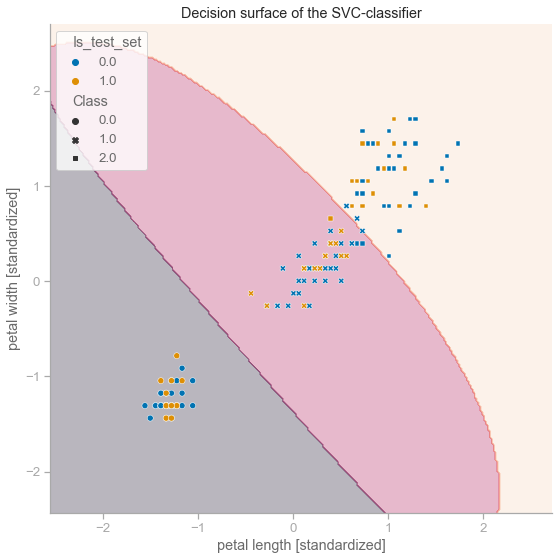

C = 3.7750000000000004


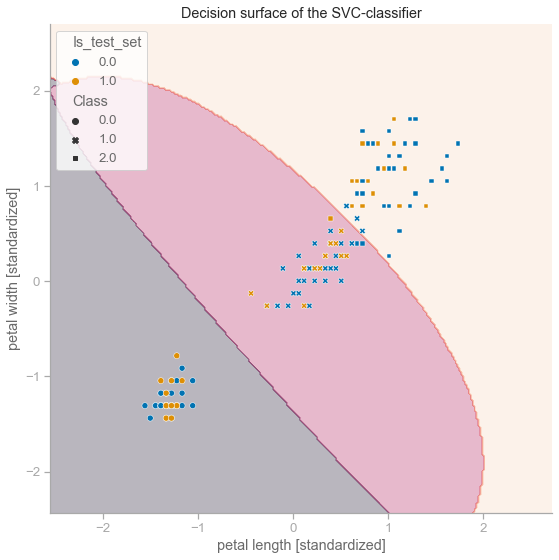

C = 5.0


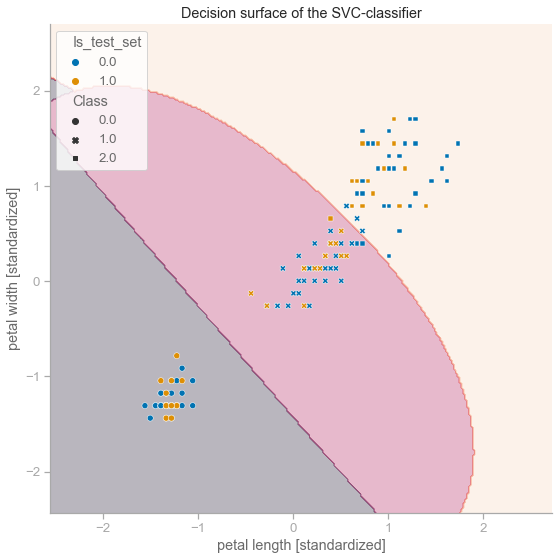

In [24]:
for c in np.linspace(0.1, 5, num=5):
    svc_classifier = SVC(gamma=0.2, random_state=1, kernel="rbf", C=c)
    svc_classifier.fit(scaled_X_train, y_train)
    print("C = {}".format(c))
    plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), svc_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]), save_fig=False)

### Variation in the kernel coefficient gamma
If we increase the value of gamma, we increase the influence or reach of the training samples, which leads to a tighter and bumpier decision boundary.

gamma = 0.1


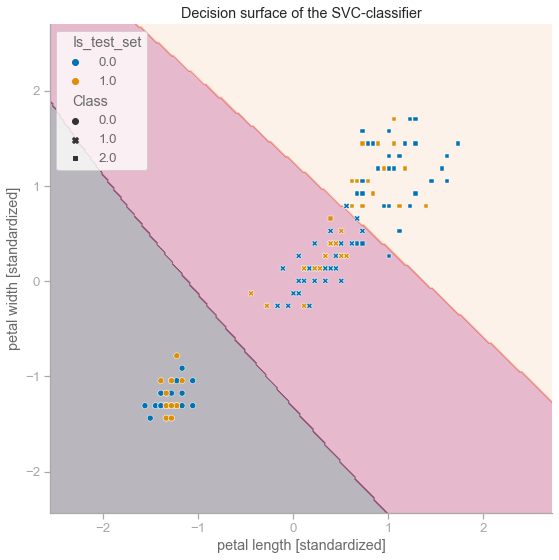

gamma = 25.075000000000003


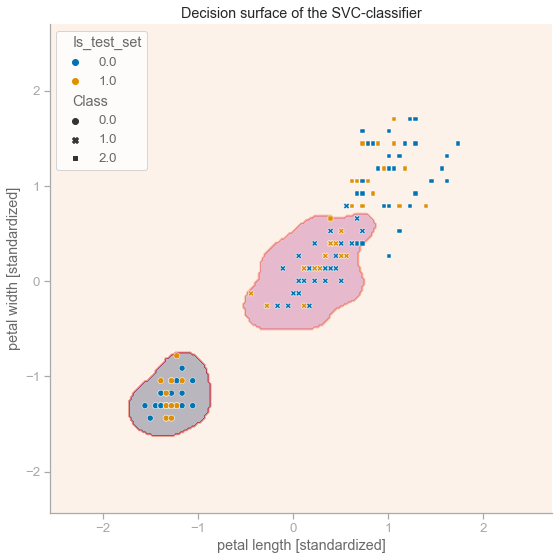

gamma = 50.050000000000004


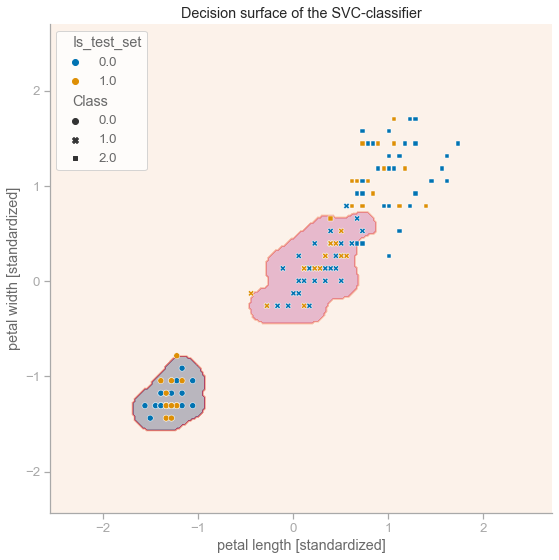

gamma = 75.025


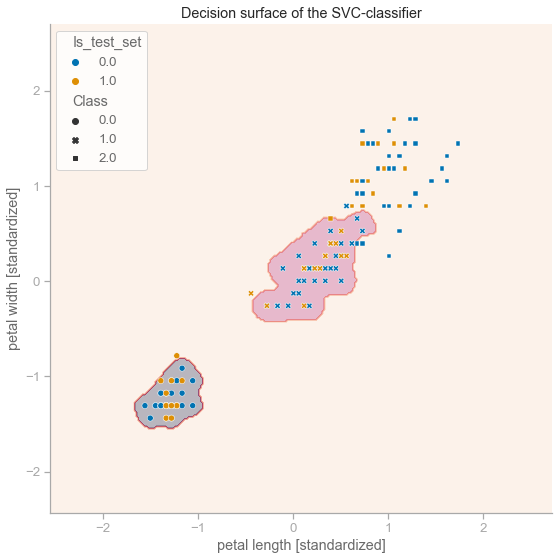

gamma = 100.0


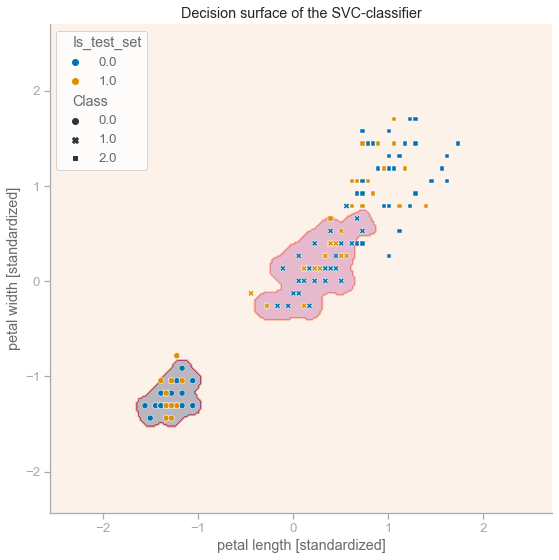

In [25]:
for gamma in np.linspace(0.1, 100, num=5):
    svc_classifier = SVC(gamma=gamma, random_state=1, kernel="rbf", C=1.0)
    svc_classifier.fit(scaled_X_train, y_train)
    print("gamma = {}".format(gamma))
    plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), svc_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]), save_fig=False)

Better choose gamma carefully as it looks like it could lead to high model variance.

## Try different degrees in the polynomial kernel

degree = 1


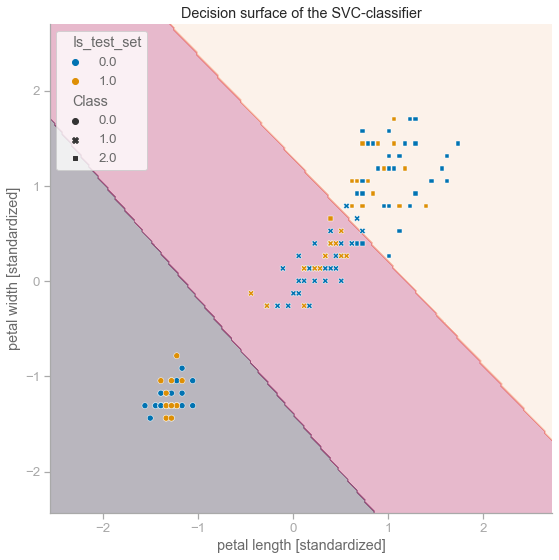

degree = 2


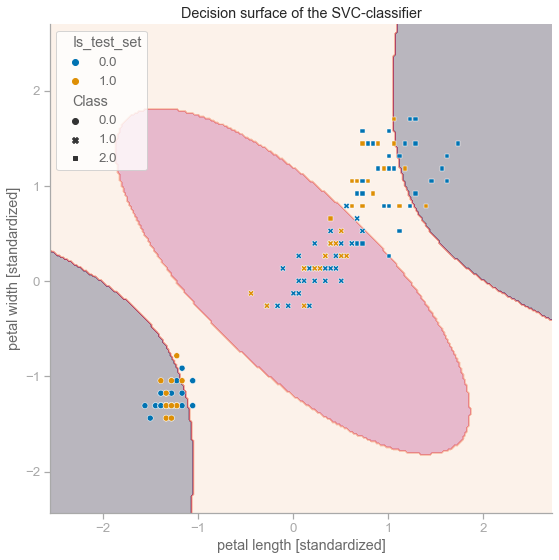

degree = 3


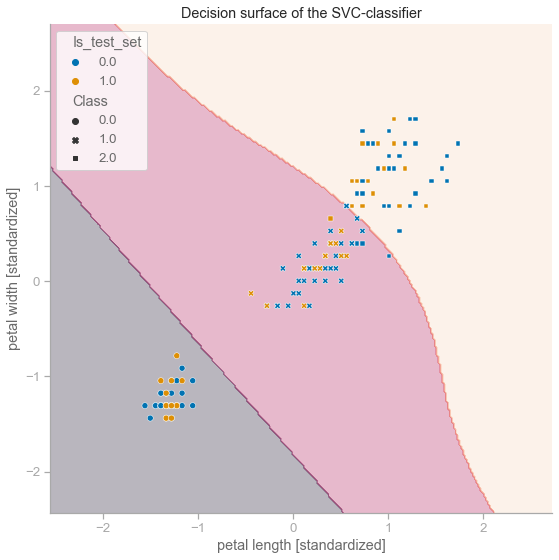

degree = 4


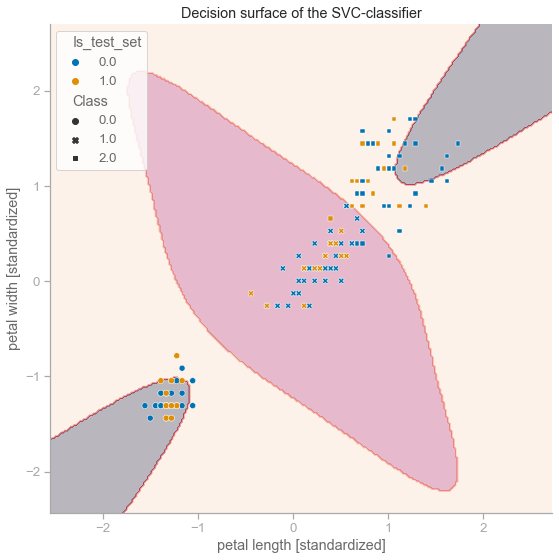

degree = 5


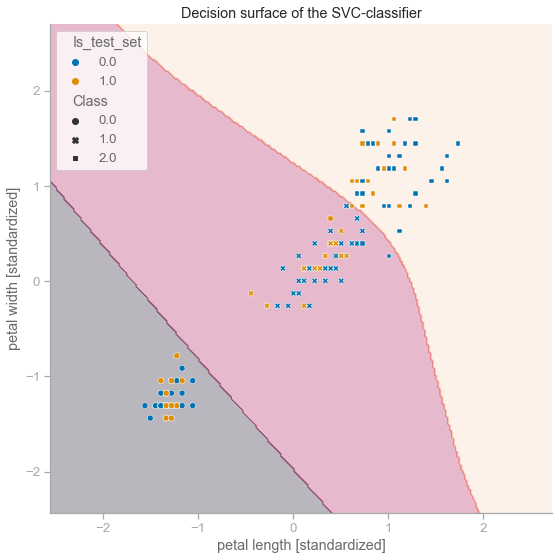

In [26]:
for degree in np.arange(1, 6, 1):
    svc_classifier = SVC(gamma=0.8, random_state=1, kernel="poly", C=1.0, degree=degree)
    svc_classifier.fit(scaled_X_train, y_train)
    print("degree = {}".format(degree))
    plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), svc_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]), save_fig=False)

A polynomial kernel is way less felxible than a Gaussian kernel but I presume that might be useful if you have a good understanding of the problem at hand.

# Decision tree classifier

max_depth = 2


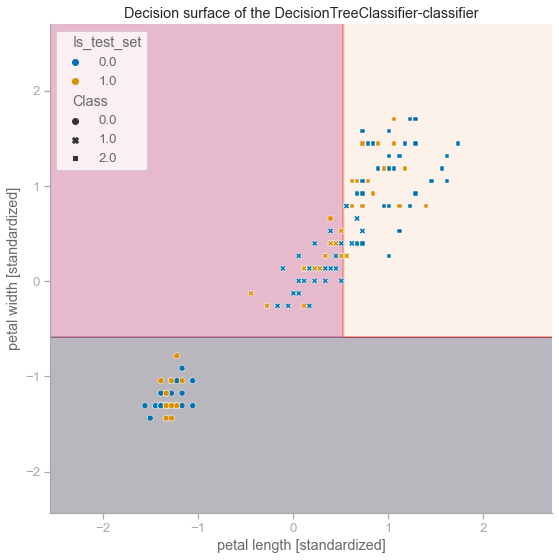

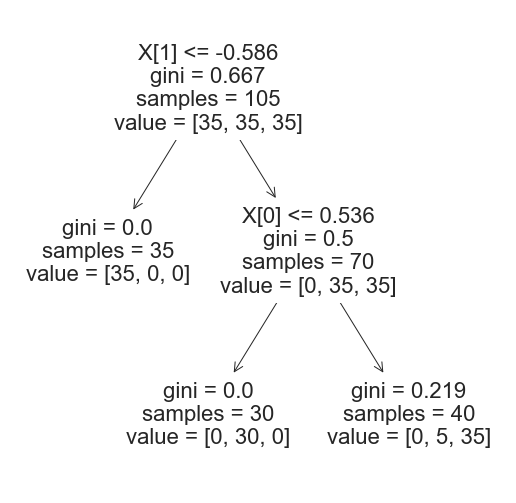

max_depth = 4


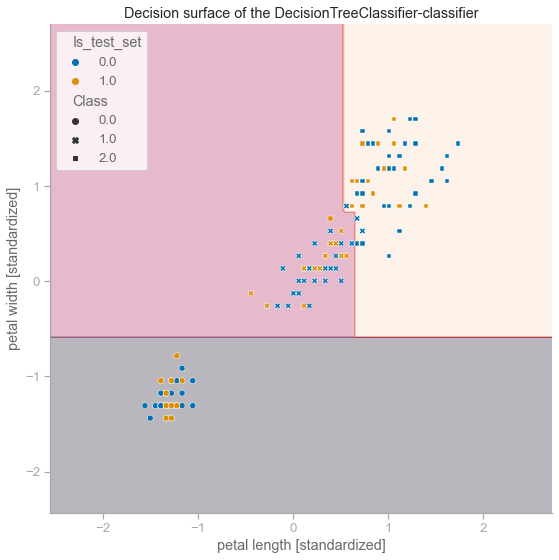

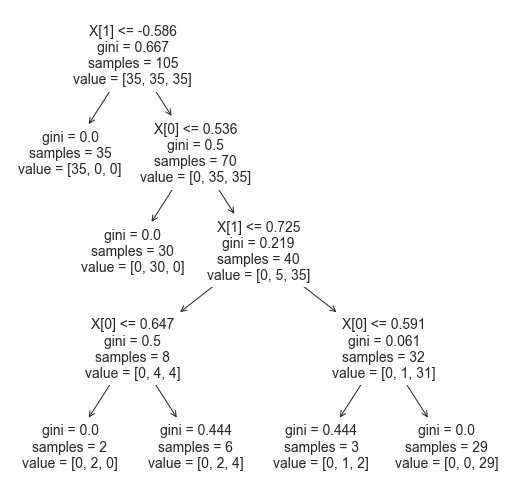

max_depth = 6


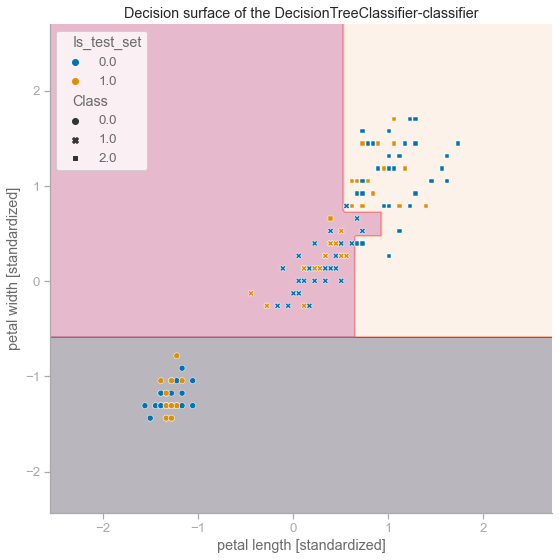

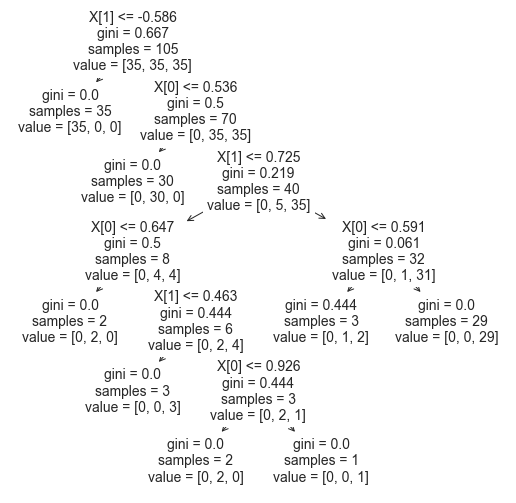

max_depth = 8


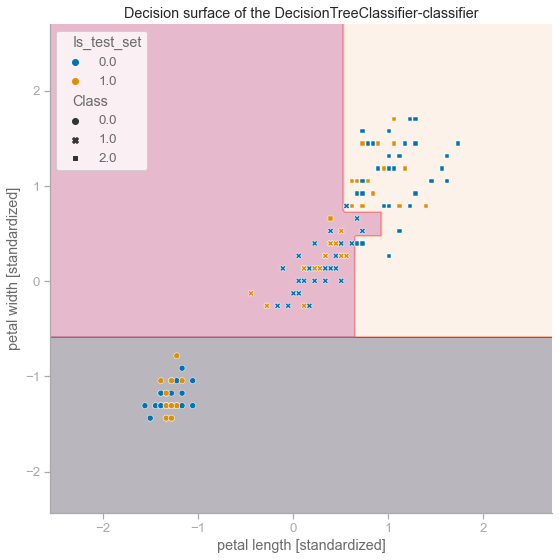

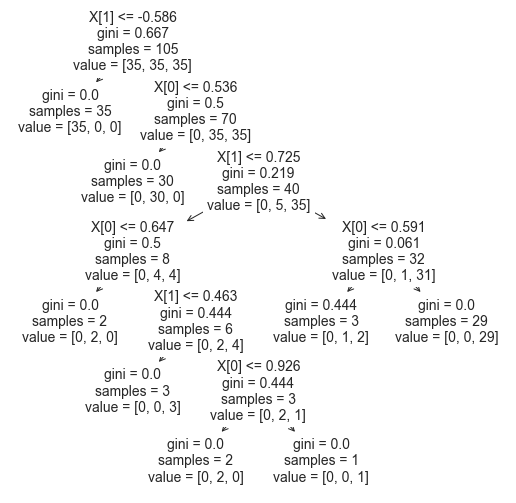

max_depth = None


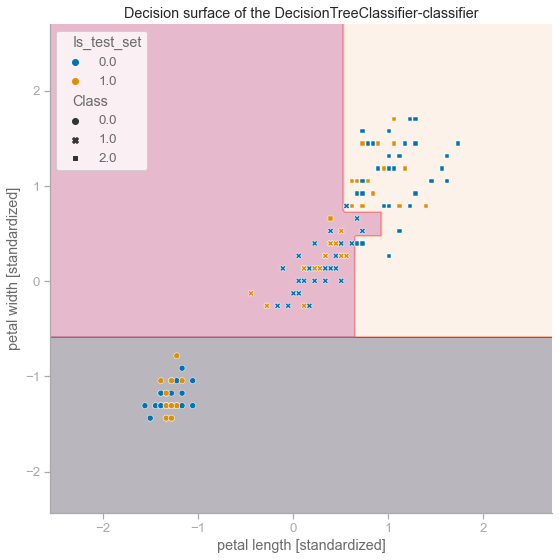

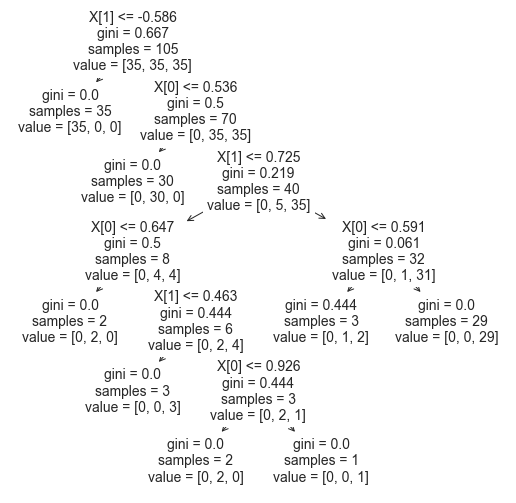

In [27]:
for max_depth in [2, 4, 6, 8, None]:
    decision_tree_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    decision_tree_classifier.fit(scaled_X_train, y_train)
    print("max_depth = {}".format(max_depth))
    plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), decision_tree_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]), save_fig=False)
    tree.plot_tree(decision_tree_classifier)
    plt.show()

Further increasing the maximal depth does not necessarily lead to a more complexity of the model.
## Visualise decision tree via the PyDotPlus package

In [31]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=1)
decision_tree_classifier.fit(scaled_X_train, y_train)
dot_data = export_graphviz(decision_tree_classifier,
                          filled=True,
                          rounded=True,
                          class_names=["Setosa", "Versicolor", "Virginica"],
                          feature_names=["petal length [standardized]", "petal width [standardized]"],
                          out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png(os.path.join(PATH_TO_FIGURES, "pydotplus_tree.png"))

True

![title](../figures\\pydotplus_tree.png)

# Random forest classifier
## Try different number of estimators
Typically, the larger the number of trees, the better the performance of the random forest at the expense of an increased computational cost.

In [ ]:
for n_estimators in np.arange(5, 26, 5):
    random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=1)
    random_forest_classifier.fit(scaled_X_train, y_train)
    print("n_estimators = {}".format(n_estimators))
    plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), random_forest_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]), save_fig=False)

## Try different number of max_samples
Shrinking the size of the bootstrap samples may increase the randomness of the randomforest, and it can help to reduce the effect of overfitting.

In [ ]:
for max_samples in np.linspace(0.1, 1, 5):
    random_forest_classifier = RandomForestClassifier(n_estimators=15, random_state=1, bootstrap=True, max_samples=max_samples)
    random_forest_classifier.fit(scaled_X_train, y_train)
    print("max_samples = {}".format(max_samples))
    plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), random_forest_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]), save_fig=False)

# K-nearest-neighbour (KNN) classifier

In [ ]:
for n_neighbors in np.arange(2, 11, 2):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(scaled_X_train, y_train)
    print("n_neighbors = {}".format(n_neighbors))
    plot_decision_surface(np.vstack((scaled_X_train, scaled_X_test)), np.hstack((y_train, y_test)), knn_classifier, xlabel="petal length [standardized]", ylabel="petal width [standardized]", is_test=np.array([0]*scaled_X_train.shape[0]+[1]*scaled_X_test.shape[0]), save_fig=False)

In this example, the decision surface becomes more smooth with an increasing number of neighbors. In comparison to the other methods, the knn-classifier is noticably slower even with the small iris data set.